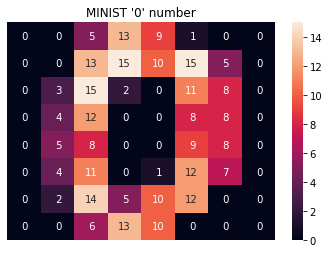

In [6]:
from sklearn.datasets import load_digits
import  matplotlib.pyplot as plt
import seaborn as sns
digits = load_digits()

sns.heatmap(digits.images[0], annot=True, fmt="2.0f", cbar=True, xticklabels=False, yticklabels=False)
plt.title("MINIST '0' number")
plt.show()

In [7]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
print('입력: \n', news.data[0])
print('출력: \n', news.target_names[news.target[0]])

입력: 
 From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





출력: 
 rec.autos


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words="english").fit(news.data[:100])
data = vec.transform(news.data[:100])
data.shape

(100, 6288)

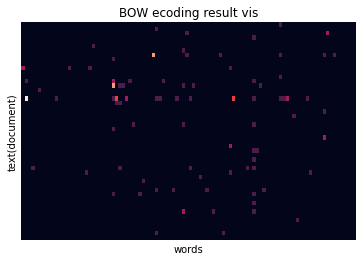

In [10]:
sns.heatmap(data.toarray()[:50, :100], linewidths=0.001, linecolor='gray', cbar=False, xticklabels=False, yticklabels=False)
plt.xlabel('words')
plt.ylabel('text(document)')
plt.title("BOW ecoding result vis")
plt.show()

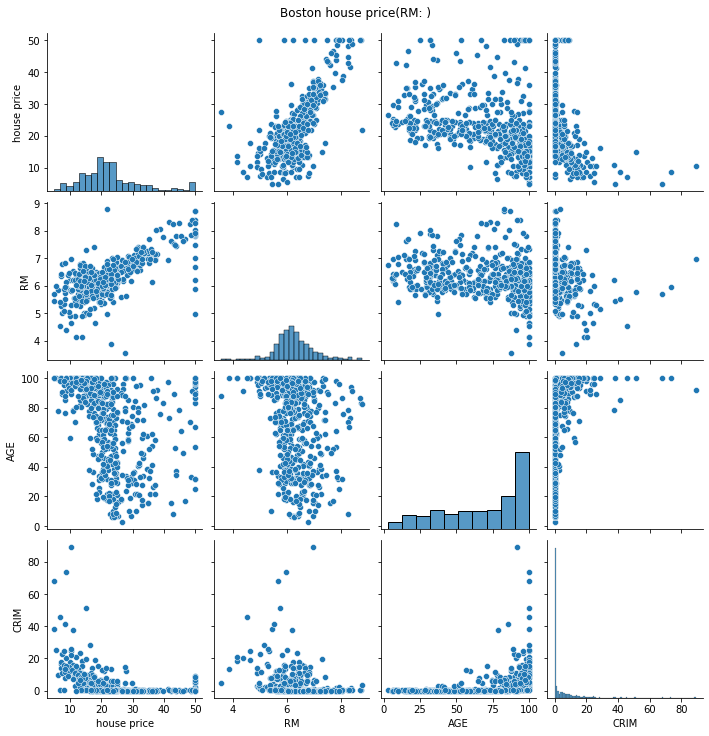

In [14]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["house price"] = boston.target
g = sns.pairplot(df[["house price", "RM", "AGE", "CRIM"]])
g.fig.suptitle("Boston house price(RM: )", y=1.02)
plt.show()

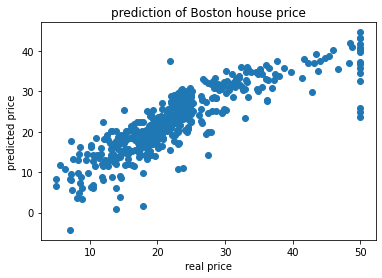

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(boston.data, boston.target)
predicted = model.predict(boston.data)
plt.scatter(boston.target, predicted)
plt.xlabel("real price")
plt.ylabel("predicted price")
plt.title("prediction of Boston house price")
plt.show()

In [23]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species']=sy

np.random.seed(0)
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


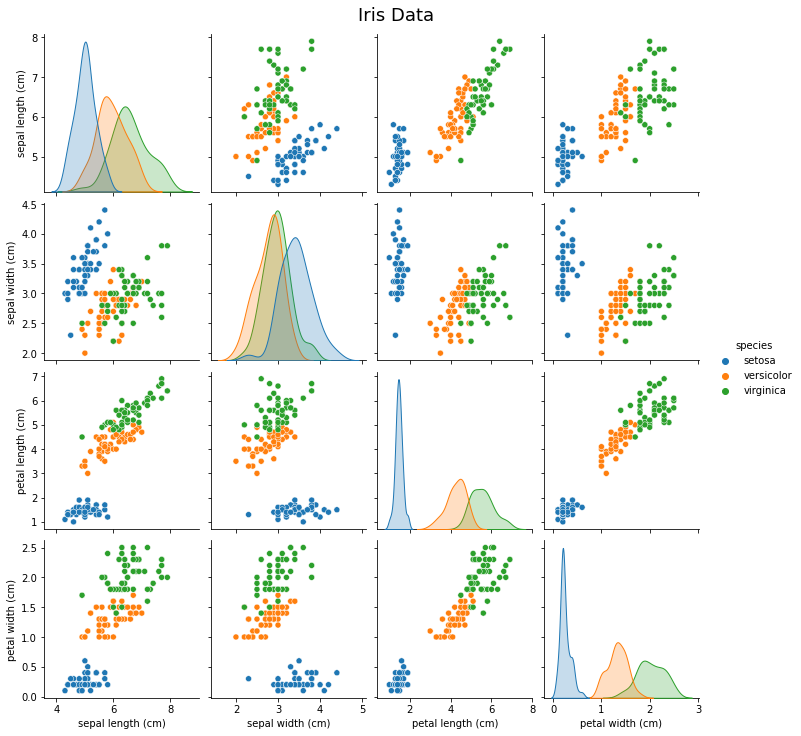

In [28]:
#sns.pairplot(df, hue="species", markers=["o", "s", "x"])
sns.pairplot(df, hue="species")

plt.suptitle("Iris Data", y=1.02, fontsize=18)
plt.show()

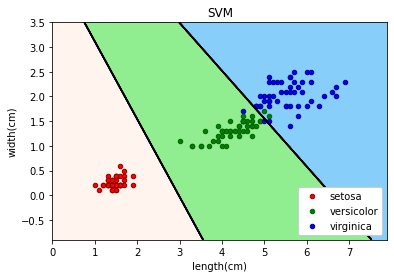

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib as mpl

features = [2, 3]
X = iris.data[:, features]
y = iris.target

model = SVC(kernel="linear", random_state=0)
model.fit(X, y)

XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() -1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                    np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y==0, 0], X[y== 0, 1], s=20, label=iris.target_names[0],
           marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y==1, 0], X[y== 1, 1], s=20, label=iris.target_names[1],
           marker="o", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y==2, 0], X[y== 2, 1], s=20, label=iris.target_names[2],
           marker="o", edgecolors="darkblue", facecolors="blue")

plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("length(cm)")
plt.ylabel("width(cm)")
plt.title("SVM")
plt.legend(loc="lower right", framealpha=1)
plt.show()